# Detailed example of classification with marcia and image data

## Needed Files

- Elementary maps (.bmp / .tif / .jpg / .png).

<center><img src="Data/lead_ore_Fe.bmp" width="400"/>

Example of elementary map : Iron (Fe).

Elementary maps are image files and do not contain energy counts anymore. Therefore, only relative intensitivy for a same element can be used to classify pixels.

- A table with one column named "Element" and columns with user defined name for minerals or multi-element compound. 
The table is most of the time a spreadsheet: a csv file or xls file.

Element | Galene | Chalcopyrite | Siderite | Quartz
- | - | - | - |- 
Al |  |  |  | 
As |  |  |  |
Ca |  |  |  |
Cl |  |  |  |
Cu |  |  |  |
Fe |  |  |  |
K |  |  |  |
Mg |  |  |  |
Mn |  |  |  |
Na |  |  |  |
Pb |  |  |  |
S |  |  |  |
Si |  |  |  |
Ti |  |  |  |
Color |  |  |  |

Given element names must be available in the data, bein a datacube or a specific imagefile.
Colors can also be provided for consistency in plotting. Colors must be specified according to the matplotlib library:
https://matplotlib.org/3.1.0/gallery/color/named_colors.html

## How to fill the cells of the table
- A value between 0 and 1 corresponding to relative percentage of intensity for each element

## What values are accepted 
- One number, meaning corresponding class accepts only values higher than the given threshold.
- Two values separed with a dash "-", meaning corresponding class accepts only values comprise between the given thresholds.

# How To Use MARCIA

Create a python script in the same folder as the data yo want to analyse. Then import the marcia library with the following command:

In [1]:
import marcia as mc

Data must then be uploaded to the programm.

Here, all .bmp files beginning with the name 'lead_ore' will be used.

Images are stack in order to create a datacube where the first 2 dimensions are spatial dimensions of the sample and the 3rd dimension corresponds to each image provided. 

In [2]:
data = mc.load('Data/lead_ore','.bmp')

Classification spreadsheet must then be uploaded

Elements in the datacube can be retrieved with the following command.

In [3]:
data.elements

{0: 'Al',
 1: 'As',
 2: 'Ca',
 3: 'Cl',
 4: 'Cu',
 5: 'Fe',
 6: 'K',
 7: 'Mg',
 8: 'Mn',
 9: 'Na',
 10: 'Pb',
 11: 'S',
 12: 'Si',
 13: 'Ti'}

Once the datacube created, each map can be displayed and analyzed in order to determine intensity clusters.
For example, the following command allows to plot the intensity histogram of the Lead (Pb)

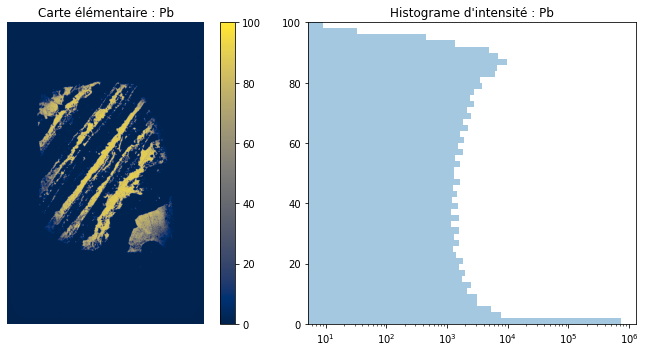

In [4]:
mc.hist(data,'Pb')

We observed here a population of of pixels between 80% et 100 % of maximum intensity, probably corresponding to our only one lead-bearing mineral: Galena. 

If more than one population is visible in the histogram, stoichiometric ratio are used to assigned population to mineral. 

In general, values inferior to 5% cannot be used and correspond to the background noise. 

In the spreadsheet file we can specify the lead threshold for the Galena. As we only see one population, we can juste provide a lower threshold (5%) in order to remove the background noise.

This value can be tuned later if classification is not accurate enough.

Element | Galene | Chalcopyrite | Siderite | Quartz
- | - | - | - |- 
Al |  |  |  | 
As |  |  |  |
Ca |  |  |  |
Cl |  |  |  |
Cu |  |  |  |
Fe |  |  |  |
K |  |  |  |
Mg |  |  |  |
Mn |  |  |  |
Na |  |  |  |
Pb |  0.05|  |  |
S |  |  |  |
Si |  |  |  |
Ti |  |  |  |
Couleur |  |  |  |

Classification file must then be upload in order to create the mineral classification. 

In [5]:
mask = mc.load_mask('Data/Mask.xlsx')

A new datacube of mineral is then created using the original data and the classification file.
This new datacube allows to compute mineral proportion, mineral classification accuracy and extract binary mineral mask.

In [6]:
mineral_cube = mc.mineralcube_creation(data,mask)

Like the original datacube, the mineral can be plotted and the accuracy of the classification for each pixel can be retrieved. 

Mineral accuracy relates to the fact that a pixel might be associated to more than one mineral, which is physically impossible.

Again, mineral list is accessible through the following command.

In [7]:
mineral_cube.elements

{0: 'Galene', 1: 'Chalcopyrite', 2: 'Siderite', 3: 'Quartz'}

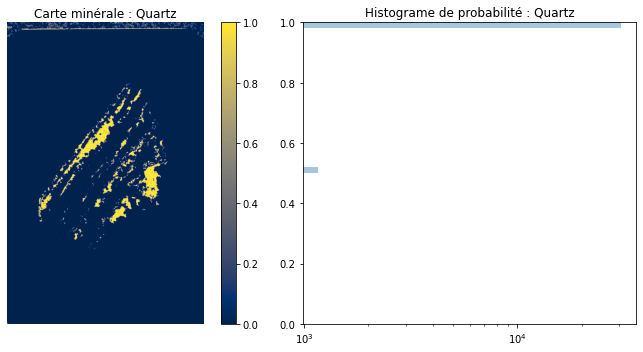

In [8]:
mc.hist(mineral_cube,'Quartz')

For example, here most of the pixel accuracy is one, meaning the pixels are correctly clasiffied. But some pixels have an accuracy of 0.5. This means the pixel are classified as 2 minerals in the same time.

Now that classes are created, we can specify querries for an element in a given mineral.

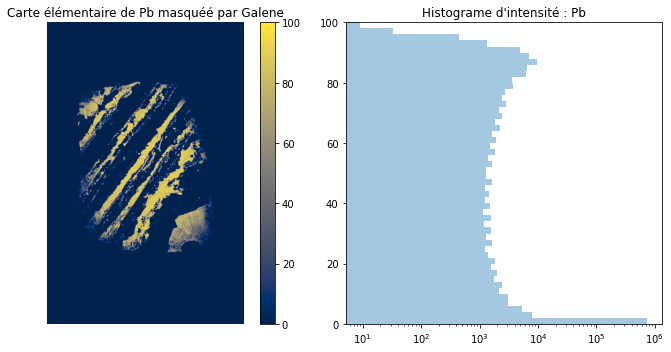

In [9]:
mc.hist_in_mask(data, mineral_cube, 'Pb', 'Galene' )

In order to verify classification, user can plot mineral map, showing a summary of the different minerals, their proportion, the proportion of misclassified pixel (pixels that are classified as more than one mineral) and the proportion of not classified (pixels that are classified as no mineral). 

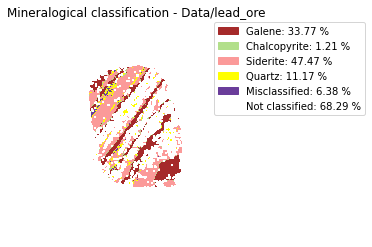

In [10]:
mc.plot_minerals(mineral_cube)

L'image ainsi obtenue montre le minéral classifié ainsi que sa proportion. Sont égalements affichés les pixels classés dans plusieurs minéraux et sont appelés mixtes. La somme des proportions des minéraux et des mixtes boucle à 100%. La proportion de pixels non indexés sur toute l'images est également affichés. Ici, cela montre que 87.2% des pixels n'ont pas encore été classés et que sur sur les 12.8% classés, 100% correspondent à de la galène.

En analysant les différents histogrammes des éléments on peut réaliser des seuils pour les autres minéraux et réaliser une classification complète. Un exempel de remplissage du tableur est presenté ci-dessous. Il n'est cependant pas unique et est à l'appréciation de l'utilisateur qui connait son echantillon et sa minéralogie.

Element | Galene | Chalcopyrite | Siderite | Quartz
- | - | - | - |- 
Al |  |  |  | 
As |  |  |  |
Ca |  |  |0.2  |
Cl |  |  |  |
Cu |  | 0.9 |  |
Fe |  | 0.9 | 0.05 - 0.89 |
K |  |  |  |
Mg |  |  |  |
Mn |  |  |  |
Na |  |  |  |
Pb |  0.05|  |  |
S | 0.05 |0.05  |  |
Si |  |  | 0.7 |
Ti |  |  |  |
Couleur | Brown |  | Yellow |

Ainsi on recharge le tableur
